<a href="https://colab.research.google.com/github/aqibjunaid/Machine-learning/blob/main/Trees_keras_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil

In [2]:
class_0 = [i for i in os.listdir() if i[-5:] == '0.jpg']
class_1 = [i for i in os.listdir() if i[-5:] == '1.jpg']

In [3]:
all_classes = [class_0, class_1]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [5]:
IMG_SIZE = 100

training_data = []

def create_training_data():
    for category in [0,1]:  # do for label 0 and 1

        for img in all_classes[category]:  # iterate over each image per labels assigned
            try:
                img_array = cv2.imread(img)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, category])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

In [6]:
import random
random.shuffle(training_data)

In [7]:
len(training_data)

106

In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
# y = np.array(y)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
history = model.fit(X, y, batch_size=4, epochs=100, validation_split=0.3, callbacks=[callback])



Epoch 1/100
19/19 [==============================] - 12s 71ms/step - loss: 9.2977 - accuracy: 0.5676 - val_loss: 0.5410 - val_accuracy: 0.7812
Epoch 2/100
19/19 [==============================] - 1s 39ms/step - loss: 0.6291 - accuracy: 0.7027 - val_loss: 0.5590 - val_accuracy: 0.7812
Epoch 3/100
19/19 [==============================] - 1s 38ms/step - loss: 0.5679 - accuracy: 0.7027 - val_loss: 0.6068 - val_accuracy: 0.7500
Epoch 4/100
19/19 [==============================] - 1s 39ms/step - loss: 0.4496 - accuracy: 0.8108 - val_loss: 0.4802 - val_accuracy: 0.7188
Epoch 5/100
19/19 [==============================] - 1s 42ms/step - loss: 0.2794 - accuracy: 0.8649 - val_loss: 0.5896 - val_accuracy: 0.6875
Epoch 6/100
19/19 [==============================] - 1s 41ms/step - loss: 0.1336 - accuracy: 0.9595 - val_loss: 1.5544 - val_accuracy: 0.5938
Epoch 7/100
19/19 [==============================] - 1s 39ms/step - loss: 0.1842 - accuracy: 0.9459 - val_loss: 1.1168 - val_accuracy: 0.5938
Epoch

In [20]:
y

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(model.predict(X).round(), y)

0.8962264150943396

In [12]:
f1_score(y, model.predict(X).round(), average='micro')

0.8962264150943396

In [13]:
import pandas as pd
df = pd.DataFrame(history.history)

In [14]:
df['epoch'] = list(range(1, len(df) +1))

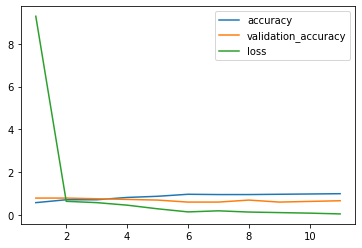

In [20]:
plt.plot(df.epoch, df.accuracy, label ='accuracy')
plt.plot(df.epoch, df.val_accuracy, label ='validation_accuracy')
plt.plot(df.epoch, df.loss, label = 'loss')
plt.legend()


In [25]:
32 * .8125

26.0

In [18]:
df

,loss,accuracy,val_loss,val_accuracy,epoch
0,9.297658,0.567568,0.540986,0.78125,1
1,0.629058,0.702703,0.559001,0.78125,2
2,0.567884,0.702703,0.606811,0.75000,3
3,0.449606,0.810811,0.480164,0.71875,4
4,0.279367,0.864865,0.589637,0.68750,5
5,0.133580,0.959459,1.554409,0.59375,6
6,0.184242,0.945946,1.116803,0.59375,7
7,0.126996,0.945946,1.056145,0.68750,8
8,0.101376,0.959459,0.859315,0.59375,9
9,0.075512,0.972973,1.157745,0.62500,10
